# Raw Spectra

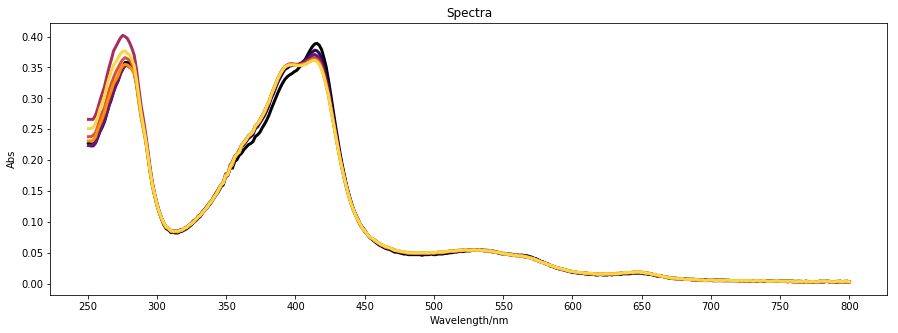

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('---------csv', 
                   encoding = 'iso-8859-1',
                  index_col = 0)



columns = list(data)
columns = [0] + columns[1::2]
del columns[-1]

data = data.drop(['Wavelength (nm)'])
data = data[data.columns[::2]]
data.columns = columns
data = data.dropna()
data = data.transpose()
data = data.astype('float').round(3)
data = data.iloc[:,::-1]


columns = list(data)
columns = np.asarray(columns).astype(float).round(3)
data.columns = columns
data = data[data.columns[data.columns >250]]


fig, ax = plt.subplots(figsize=(15,5))
ax.set_prop_cycle('color',plt.cm.inferno(np.linspace(0,0.9,len(data))))

for i in range(0,len(data)):
    plt.plot(data.iloc[i,:],
            lw = 3)
    
plt.title('Spectra')    
plt.xticks(np.linspace(250,800,12))
plt.ylabel('Abs')
plt.xlabel('Wavelength/nm')

plt.show()

# Difference Spectra

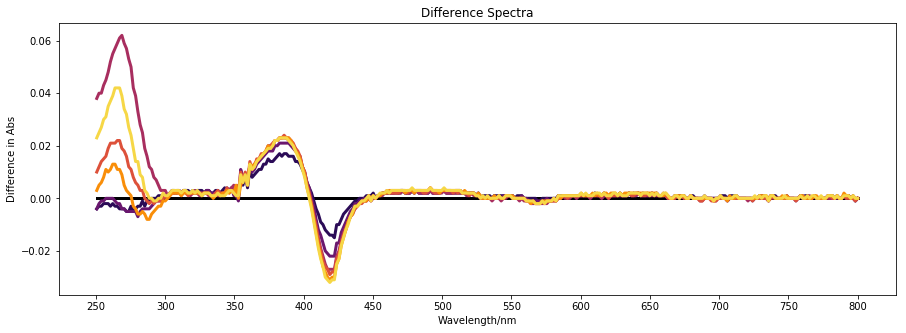

In [3]:
data = data - data.loc[0]

fig, ax = plt.subplots(figsize=(15,5))
ax.set_prop_cycle('color',plt.cm.inferno(np.linspace(0,0.9,len(data))))

for i in range(0,len(data)):
    plt.plot(data.iloc[i,:],
            lw = 3)
    
plt.title('Difference Spectra')    
plt.xticks(np.linspace(250,800,12))
plt.ylabel('Difference in Abs')
plt.xlabel('Wavelength/nm')

plt.show()

# Michaelis Menten

In [1]:
print(data.index)
substrate = input([0,50,100,150,200,250,300])
substrate = np.array(substrate.split(',')).astype(int)
print(substrate)

NameError: name 'data' is not defined

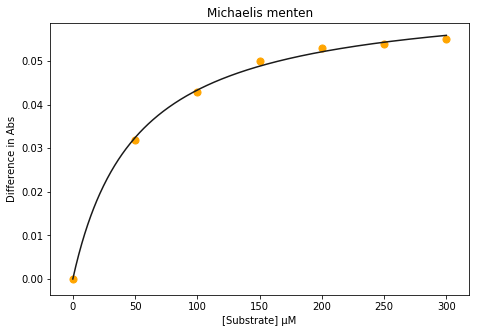

Amax =  0.06538695462061882
Kd =  50.77840393444859
r_squared =  0.9985786651784607


In [21]:
from scipy import optimize


def curve(x, vmax, km):
    y = (vmax*x)/(km + x)
    return y


data = data[data.columns[data.columns >350]]
menten = data.max(axis = 1)-data.min(axis = 1)
x = list(range(0, len(menten)))    ###### temporary, get way to extract values

params, cov = optimize.curve_fit(curve, substrate, menten,
                                               p0=[2, 2])

#Theoretical Curve
vmax = params[0]
km = params[1]
x2 = np.linspace(0,substrate.max(), 500)
y2 = curve(x2, vmax, km)


# R^2
residuals = menten - curve(substrate, params[0], params[1])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((menten-np.mean(menten))**2)
r_squared = 1 - (ss_res / ss_tot)


fig, ax = plt.subplots(figsize=(7.5,5))
plt.set_cmap('inferno')

plt.plot(x2, y2,
        color = '0.1')
plt.scatter(substrate, menten,
           color = 'orange',
           s = 50)


plt.title('Michaelis menten')    
plt.ylabel('Difference in Abs')
plt.xlabel('[Substrate] µM')


plt.show()

print('Amax = ', vmax)
print('Kd = ', km)
print('r_squared = ',r_squared)